In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
file_path = r"datos_apartamentos_rent_actualizado.xlsx"
df =pd.DataFrame(pd.read_excel(r"datos_apartamentos_rent.xlsx"))
df_final = pd.read_excel(file_path)
df_final = pd.DataFrame(df_final)
# Extraer las comodidades de los inmueblde de la columna "amenities"
def get_unique_amenities(df, column="amenities"):
    unique_amenities = set()
    df[column].dropna().apply(lambda x: unique_amenities.update(x.split(",")))
    return list(unique_amenities)
# Obtener lista sin duplicados
unique_amenities_list = get_unique_amenities(df)

# Tarea 4 - Revisualización

In [3]:
#Reondear baños a entero más cercano
df_final["bathrooms"] = np.ceil(df_final["bathrooms"])
df_final["bedrooms"] =np.ceil(df_final["bedrooms"])

In [4]:
# Categorizar los amenities
for i in unique_amenities_list:
    lista_amen = []
    for j in df_final["amenities"]:
        if i in j:
            lista_amen.append(1)
        else:
            lista_amen.append(0)
    df_final[i] = lista_amen

# Arreglar nulos en cities y states
for i in df_final.iterrows():
    if pd.isna(df_final.at[i[0],"cityname"]):
        df_final.at[i[0],"cityname"] = df_final.columns[np.where(i[1][26:1600] == True)[0][0]+25].split("_")[2]

for i in df_final.iterrows():
    if pd.isna(df_final.at[i[0],"state"]):
        df_final.at[i[0],"state"] = df_final.columns[np.where(i[1][1601:1651] == True)[0][0]+1600].split("_")[2]

### Revisualización de los datos

C:\Users\felip\AppData\Local\Temp\ipykernel_28504\4243689115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_final["price"], palette="coolwarm")


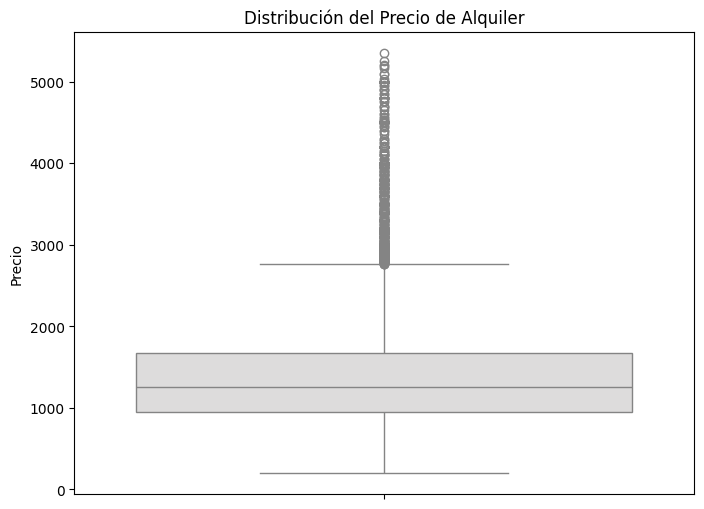

In [5]:
# Boxplot de Precio

plt.figure(figsize=(8, 6))


sns.boxplot(y=df_final["price"], palette="coolwarm")

plt.ylabel("Precio")
plt.title("Distribución del Precio de Alquiler")

plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_28504\5396835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_final["state"], y=df_final["price"], palette="muted")


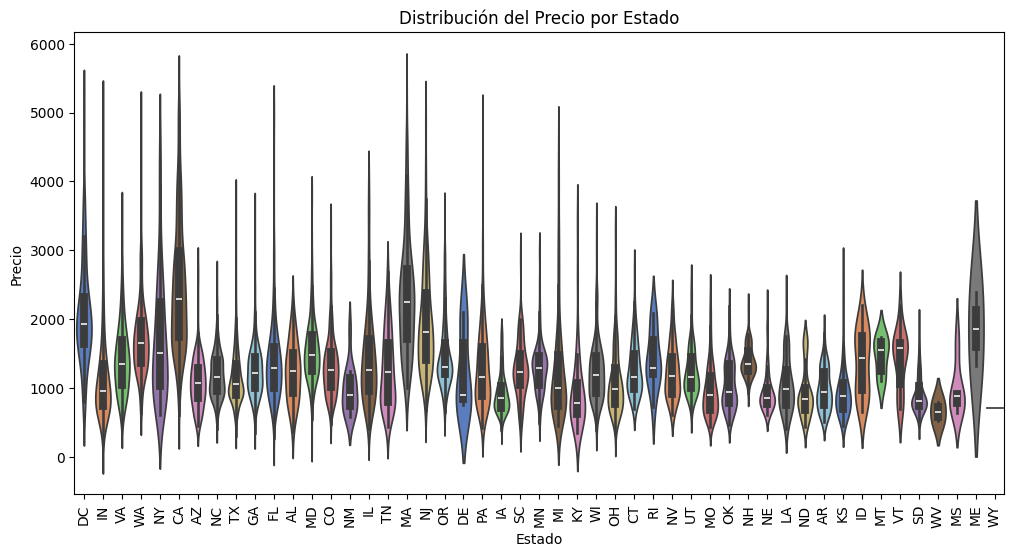

In [6]:
# Gráfico de Violin Square Feet por Estado

plt.figure(figsize=(12, 6))


sns.violinplot(x=df_final["state"], y=df_final["price"], palette="muted")

plt.xlabel("Estado")
plt.ylabel("Precio")
plt.title("Distribución del Precio por Estado")

plt.xticks(rotation=90) #Se rotan las etiquetas para mejor visualización
plt.show()

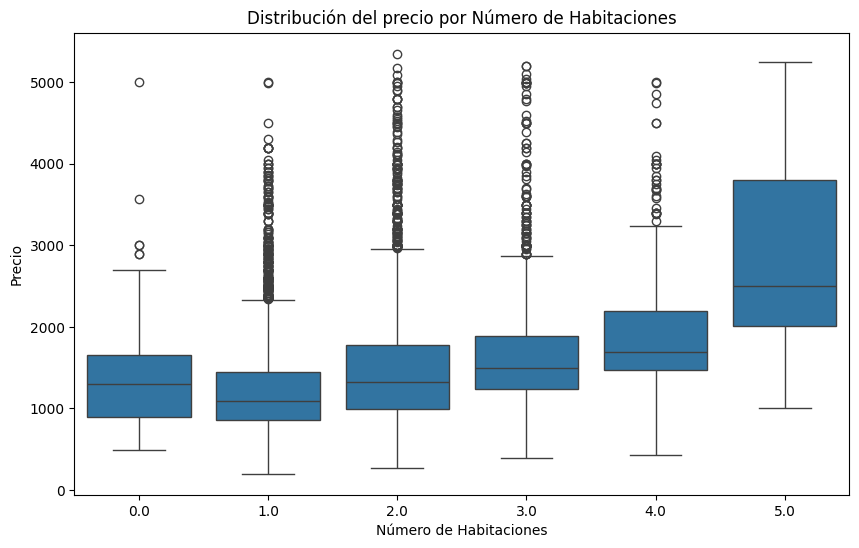

In [7]:
# Boxplot Square Feet por Número de Habitaciones

plt.figure(figsize=(10, 6))


sns.boxplot(x=df_final["bedrooms"], y=df_final["price"])

plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio")
plt.title("Distribución del precio por Número de Habitaciones")
plt.show()

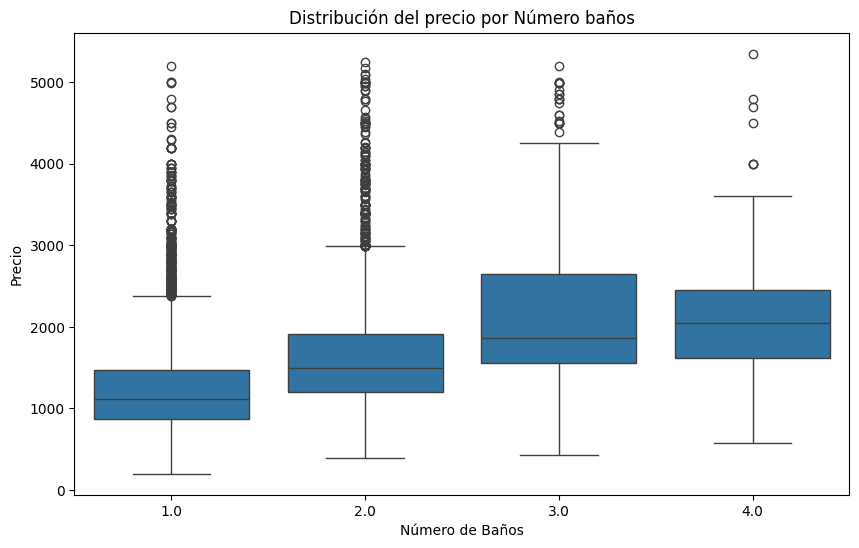

In [8]:
# Boxplot Square Feet por Número de Habitaciones

plt.figure(figsize=(10, 6))


sns.boxplot(x=df_final["bathrooms"], y=df_final["price"])

plt.xlabel("Número de Baños")
plt.ylabel("Precio")
plt.title("Distribución del precio por Número baños")
plt.show()

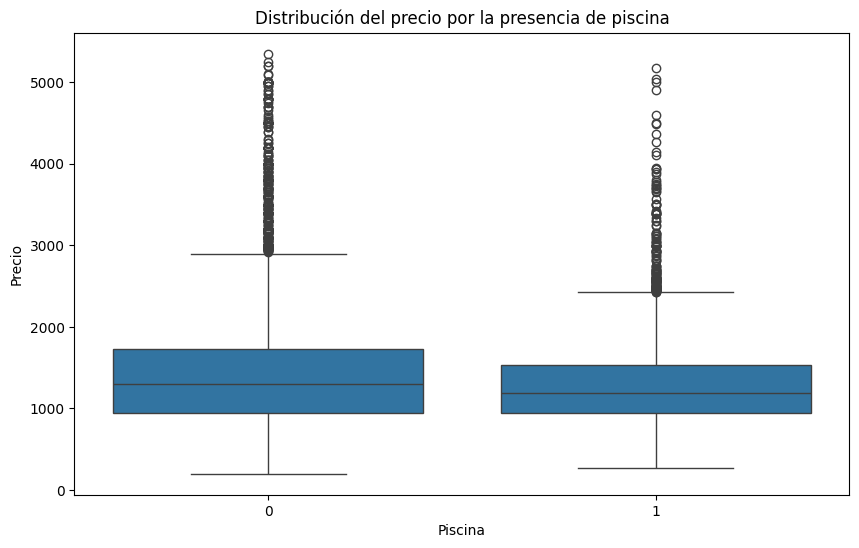

In [9]:
# Boxplot Square Feet por Número de Habitaciones

plt.figure(figsize=(10, 6))


sns.boxplot(x=df_final["Pool"], y=df_final["price"])

plt.xlabel("Piscina")
plt.ylabel("Precio")
plt.title("Distribución del precio por la presencia de piscina")
plt.show()

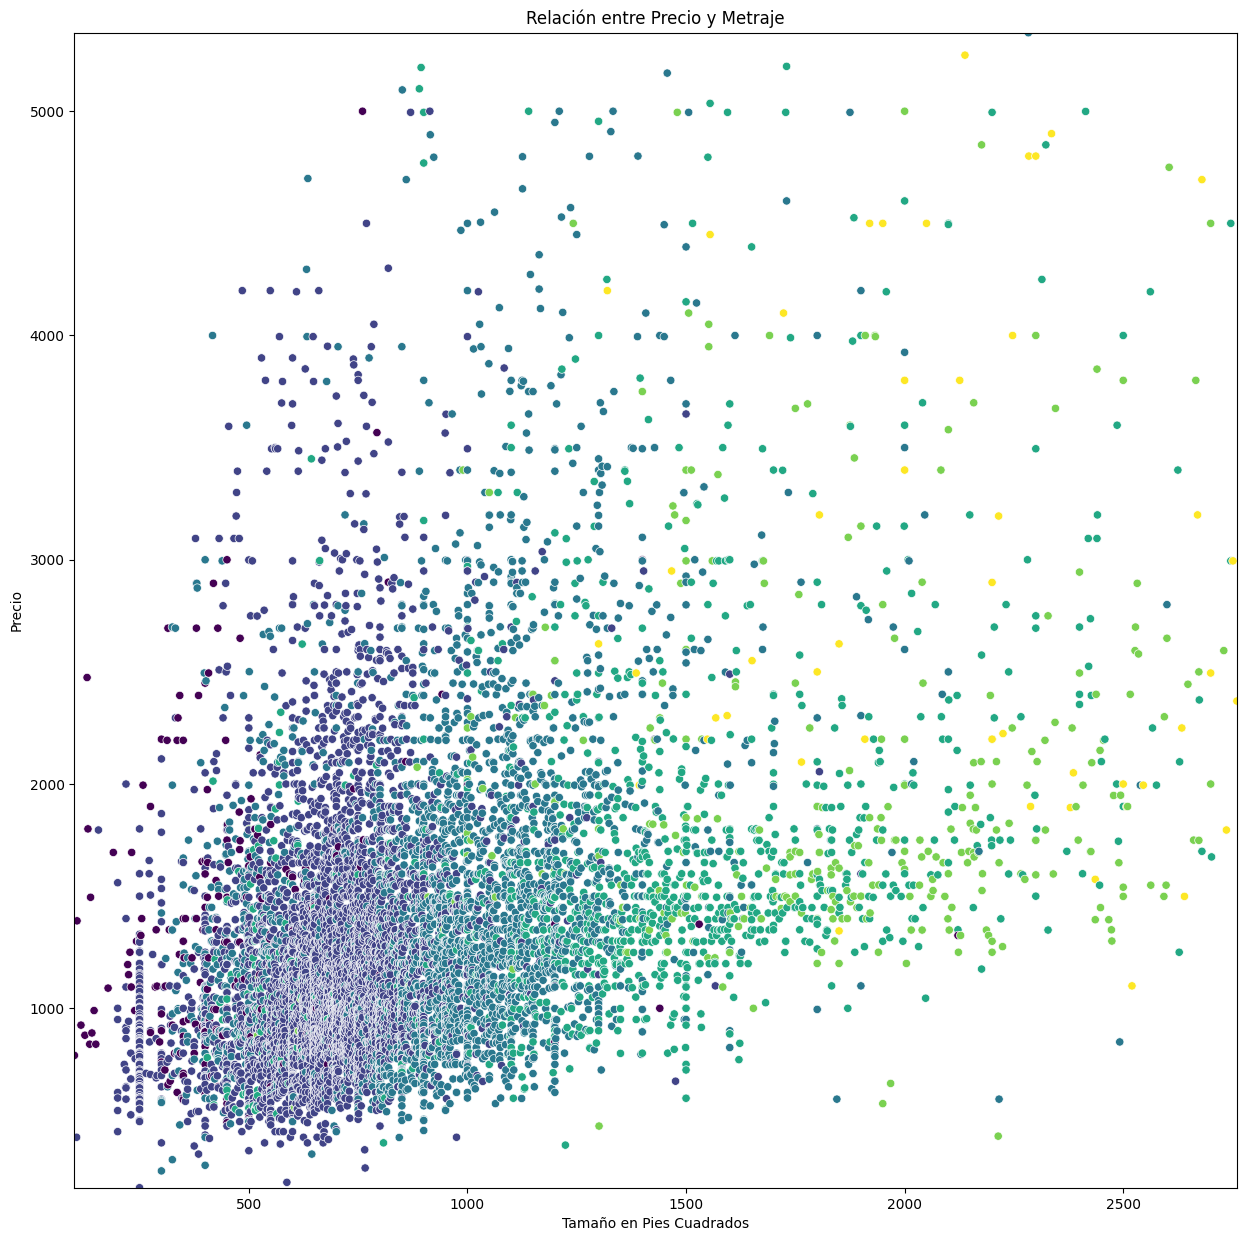

In [10]:
# Grafico Dispersión Precio vs. Square Feet

plt.figure(figsize=(15, 15))
#Se filtra el valor de 40000 pies cuadrados para mejor visualización
df_filtered = df_final[df_final["square_feet"] < 40000]
sns.scatterplot(x=df_filtered["square_feet"], y=df_filtered["price"],c=df_final["bedrooms"])
plt.xlim(df_filtered["square_feet"].min(), df_filtered["square_feet"].max())
plt.ylim(df_filtered["price_monthly"].min(), df_filtered["price"].max())
plt.xlabel("Tamaño en Pies Cuadrados")
plt.ylabel("Precio")
plt.title("Relación entre Precio y Metraje")

plt.show()

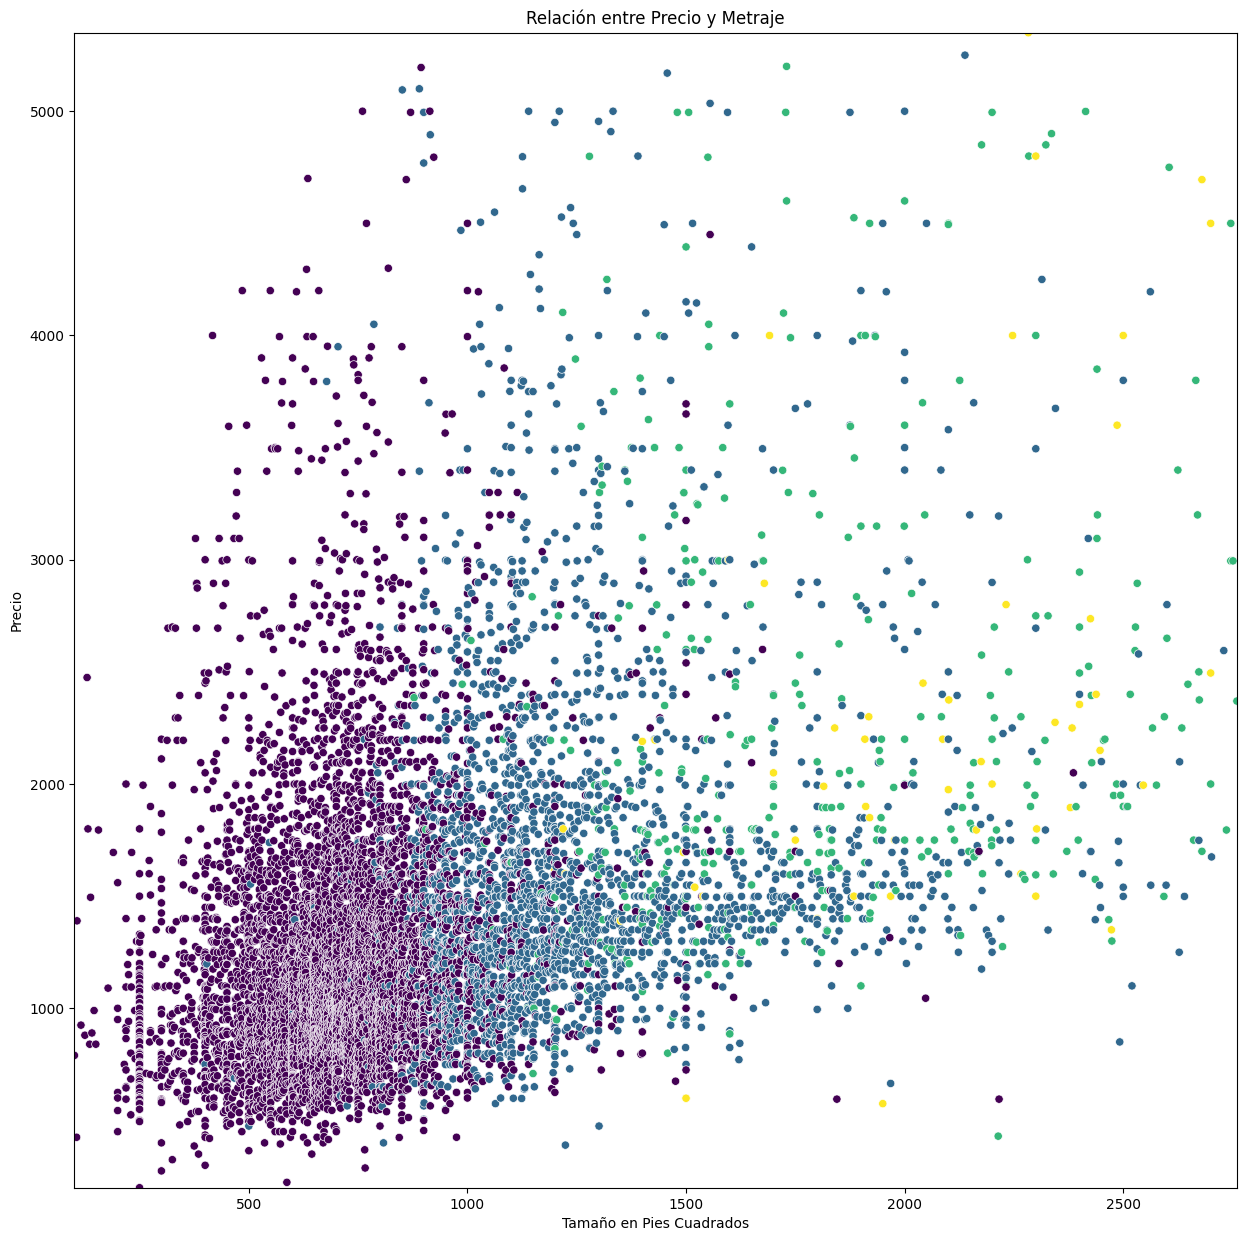

In [11]:
# Grafico Dispersión Precio vs. Square Feet

plt.figure(figsize=(15, 15))
#Se filtra el valor de 40000 pies cuadrados para mejor visualización
df_filtered = df_final[df_final["square_feet"] < 40000]
sns.scatterplot(x=df_filtered["square_feet"], y=df_filtered["price"],c=df_final["bathrooms"])
plt.xlim(df_filtered["square_feet"].min(), df_filtered["square_feet"].max())
plt.ylim(df_filtered["price"].min(), df_filtered["price"].max())
plt.xlabel("Tamaño en Pies Cuadrados")
plt.ylabel("Precio")
plt.title("Relación entre Precio y Metraje")

plt.show()

# Tarea 4 -Modelos

In [ ]:
# renombrar categorias largas
df_final = df_final.rename( columns={"category_housing/rent/home":"home","category_housing/rent/short_term":"short_term",
                                     "pets_allowed_Cats,Dogs":"pets_both","pets_allowed_Dogs":"pets_dogs","pets_allowed_None":"pets_None"})
# quitar columnas innecesarias
df_inf = df_final.drop(columns=["id","title","body","has_photo","amenities","currency","fee","price_display","price_type","address","latitude","longitude",
                                "time","pets_allowed_corrected","price_monthly"])
df_inf = df_inf.drop(columns=df_inf.columns[11:1635].values)
df_inf = df_inf.drop(columns=["cityname","year","month","day"])
#df_inf.to_excel("datos_apartamentos_rent_modelos.xlsx", index=False)

In [13]:
# Volver enteras todas las variables incluidas las booleanas
df_inf[["home","short_term","pets_both","pets_dogs","pets_None"]] =df_inf[["home","short_term","pets_both","pets_dogs","pets_None"]].astype(int)
df_inf = pd.get_dummies(df_inf, columns=["state"],drop_first=True).astype(int)

### Definición de Modelos

In [14]:
# Modelo 1: Todas las variables
X_var1 = [i for i in df_inf.columns if i != "price"]

# Modelo 2:Factores Generales y estado
X_var2 = ["bathrooms","bedrooms","square_feet","state_AR","state_AZ", "state_CA", "state_CO", "state_CT", "state_DC", "state_DE", "state_FL",
         "state_GA","state_IA","state_ID","state_IL","state_IN","state_KS","state_KY","state_LA","state_MA", "state_MD","state_ME","state_MI",
         "state_MN","state_MO","state_MS","state_MT","state_NC","state_ND","state_NE","state_NH","state_NJ","state_NM","state_NV","state_NY",
         "state_OH","state_OK","state_OR","state_PA","state_RI","state_SC","state_SD","state_TN","state_TX","state_UT","state_VA","state_VT",
         "state_WA","state_WI","state_WV", "state_WY"]

# Modelo 3: Aminities y caracteristicas
X_var3 = ["bathrooms","bedrooms","square_feet","Garbage Disposal", "TV", "Luxury", "Elevator", "Gym", "Fireplace","Washer Dryer","Doorman",
          "Cable or Satellite","Internet Access","Playground","Parking","Tennis","Gated","Pool","Basketball","View","Clubhouse",
          "Dishwasher","Patio/Deck", "Alarm", "Hot Tub", "Refrigerator", "Golf", "Storage", "Wood Floors", "AC"]

# Modelo 4: Platafroma y tipo de propiedad
X_var4 = ["source_Home Rentals","source_Listanza","source_ListedBuy","source_RENTCafé","source_RENTOCULAR","source_Real Estate Agent",
          "source_RealRentals","source_RentDigs.com","source_RentLingo","source_rentbits","source_tenantcloud","home","short_term"]

# Modelo 5: Mascotas y Segruidad
X_var5 = ["pets_both", "pets_dogs", "pets_None", "bathrooms", "bedrooms", "Gated", "Doorman", "Alarm"]

# Modelo 6: Regresión sencilla
X_var6 = ["bathrooms","bedrooms","square_feet"]

### Regresión Lineal

In [15]:
Resultados_Regresion ={}
def reg_lineal(varX):
    Y_var = "price"
    X_var =varX
    X_inf = df_inf[X_var]
    Y_inf = df_inf[Y_var]
    X_train, X_test, y_train, y_test = train_test_split(X_inf, Y_inf, random_state=1)

    # agregar constante explíticamente
    X_train = sm.add_constant(X_train)

    # regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
    model = sm.OLS(y_train, X_train).fit()

    return {'Variables': X_var,'R2': model.rsquared,"R2aj":model.rsquared_adj,"AIC":model.aic,"BIC":model.bic,
            'Coeficientes': model.params,"pvalue":model.pvalues,"modelo":model}


In [16]:
Resultados_Regresion[1]= reg_lineal(X_var1)
Resultados_Regresion[2]= reg_lineal(X_var2)
Resultados_Regresion[3]= reg_lineal(X_var3)
Resultados_Regresion[4]= reg_lineal(X_var4)
Resultados_Regresion[5]= reg_lineal(X_var5)
Resultados_Regresion[6]= reg_lineal(X_var6)

### K vecinos

In [17]:
Resultados_K ={}
def k_model(varX):
    Y_var = "price"
    X_var = varX

    X_inf = df_inf[X_var]
    Y_inf = df_inf[Y_var]
    X_train, X_test, y_train, y_test = train_test_split(X_inf, Y_inf, random_state=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor(n_neighbors=10)

    # Entrenar el modelo con los datos de entrenamiento
    knn.fit(X_train_scaled, y_train)

    # Hacer predicciones
    y_pred = knn.predict(X_test_scaled)

    return {'Variables': X_var,'R2':r2_score(y_test, y_pred),"modelo":knn}

In [18]:
Resultados_K[1]= k_model(X_var1)
Resultados_K[2]= k_model(X_var2)
Resultados_K[3]= k_model(X_var3)
Resultados_K[4]= k_model(X_var4)
Resultados_K[5]= k_model(X_var5)
Resultados_K[6]= k_model(X_var6)

### Suport Vector Regression (SVR)

In [19]:
Resultados_SVR ={}
def SVR_model(varX):
    Y_var = "price"
    X_var = varX
    X_inf = df_inf[X_var]
    Y_inf = df_inf[Y_var]
    X_train, X_test, y_train, y_test = train_test_split(X_inf, Y_inf, random_state=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

    # Entrenar el modelo con los datos de entrenamiento
    svr.fit(X_train_scaled, y_train)

    # Hacer predicciones
    y_pred = y_pred = svr.predict(X_test_scaled)

    return {'Variables': X_var,'R2':r2_score(y_test, y_pred),"modelo":svr}


In [20]:
Resultados_SVR[1]= SVR_model(X_var1)
Resultados_SVR[2]= SVR_model(X_var2)
Resultados_SVR[3]= SVR_model(X_var3)
Resultados_SVR[4]= SVR_model(X_var4)
Resultados_SVR[5]= SVR_model(X_var5)
Resultados_SVR[6]= SVR_model(X_var6)

In [21]:
# Lineal
# Modelos ordenados por R2
for i in Resultados_Regresion.keys():
    print("Para el modelo "+ str(i) +  ": El R2 ajustado es " + str(round(Resultados_Regresion[i]["R2aj"],4)) + 
          "; El AIC es " + str(round(Resultados_Regresion[i]["AIC"],4)) +"; El BIC es " + str(round(Resultados_Regresion[i]["BIC"],4)) )

Para el modelo 1: El R2 ajustado es 0.6006; El AIC es 109856.3127; El BIC es 110504.6563
Para el modelo 2: El R2 ajustado es 0.5786; El AIC es 110205.9535; El BIC es 110564.6116
Para el modelo 3: El R2 ajustado es 0.2052; El AIC es 114824.661; El BIC es 115038.4764
Para el modelo 4: El R2 ajustado es 0.0132; El AIC es 116389.0772; El BIC es 116478.7417
Para el modelo 5: El R2 ajustado es 0.1408; El AIC es 115372.9133; El BIC es 115434.9887
Para el modelo 6: El R2 ajustado es 0.1679; El AIC es 115133.8171; El BIC es 115161.4062


In [22]:
# K vecinos
for i in Resultados_K.keys():
    print("Para el modelo "+ str(i) +  ": El R2 es " + str(round(Resultados_K[i]["R2"],4)))

Para el modelo 1: El R2 es 0.5495
Para el modelo 2: El R2 es 0.5587
Para el modelo 3: El R2 es 0.1952
Para el modelo 4: El R2 es -0.0135
Para el modelo 5: El R2 es 0.0606
Para el modelo 6: El R2 es 0.1322


In [23]:
for i in Resultados_SVR.keys():
    print("Para el modelo "+ str(i) +  ": El R2 es " + str(round(Resultados_SVR[i]["R2"],4)))

Para el modelo 1: El R2 es 0.5427
Para el modelo 2: El R2 es 0.527
Para el modelo 3: El R2 es 0.1612
Para el modelo 4: El R2 es -0.0345
Para el modelo 5: El R2 es 0.0946
Para el modelo 6: El R2 es 0.1367


#### Modelos Hagalo Usted Mismo

In [24]:
def pobar_modelos(tipo,variables,predecir):
    Y_var = "price"
    X_var =variables
    X_inf = df_inf[X_var]
    Y_inf = df_inf[Y_var]
    X_train, X_test, y_train, y_test = train_test_split(X_inf, Y_inf, random_state=1)
    prediccion = np.array(predecir)

    if tipo == "Lineal":
        X_train = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train).fit()
        nuevaPred = model.predict(prediccion)
        return {'Variables': X_var,'R2': model.rsquared,"R2aj":model.rsquared_adj,"AIC":model.aic,"BIC":model.bic,'Coeficientes': model.params,"modelo":model, "Pred": nuevaPred}
    
    elif tipo == "K":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn = KNeighborsRegressor(n_neighbors=10)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        prediccion = scaler.transform(prediccion)
        nuevaPred = knn.predict(prediccion)
        return {'Variables': X_var,'R2':r2_score(y_test, y_pred),"modelo":knn, "Pred": nuevaPred}
    
    elif tipo =="SVR":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
        # Entrenar el modelo con los datos de entrenamiento
        svr.fit(X_train_scaled, y_train)
        # Hacer predicciones
        y_pred = y_pred = svr.predict(X_test_scaled)
        prediccion = scaler.transform(prediccion)
        nuevaPred = svr.predict(prediccion)

        return {'Variables': X_var,'R2':r2_score(y_test, y_pred),"modelo":svr,"Pred": nuevaPred}
    

In [84]:
for i in Resultados_Regresion.keys():
    print("-------------------------------------------------------")
    res = Resultados_Regresion[i]
    significant_coefs = {var: res['Coeficientes'][var] for var in res['Coeficientes'].index if var in res['pvalue'] and res['pvalue'][var] < 0.05}
    print("Modelo: " + str(i) )
    print("")
    print("Cantidad de variables significatvias: " + str(len(significant_coefs)))
    print("")
    print("Variables significatvias " + str([j for j in significant_coefs.keys()]))
    print("")
    print(res["modelo"].summary())
    print("")
    print("-------------------------------------------------------")
    

-------------------------------------------------------
Modelo: 1

Cantidad de variables significatvias: 46

Variables significatvias ['bathrooms', 'bedrooms', 'square_feet', 'short_term', 'source_RealRentals', 'Dishwasher', 'Elevator', 'Wood Floors', 'Cable or Satellite', 'AC', 'Luxury', 'View', 'Internet Access', 'Basketball', 'Parking', 'Gym', 'Garbage Disposal', 'Playground', 'Tennis', 'state_AR', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_FL', 'state_GA', 'state_IL', 'state_IN', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_NH', 'state_NJ', 'state_NV', 'state_NY', 'state_OR', 'state_PA', 'state_RI', 'state_TN', 'state_TX', 'state_VA', 'state_VT', 'state_WA', 'state_WI']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-sta

In [86]:
for i in Resultados_K.keys():
    print("-------------------------------------------------------")
    res = Resultados_K[i]
    print("Modelo: " + str(i) )
    print("")
    print("R2: " + str(res["R2"]))
    print("")
    print("-------------------------------------------------------")

-------------------------------------------------------
Modelo: 1

R2: 0.5494611202354869

-------------------------------------------------------
-------------------------------------------------------
Modelo: 2

R2: 0.5586961122132243

-------------------------------------------------------
-------------------------------------------------------
Modelo: 3

R2: 0.19522445806921807

-------------------------------------------------------
-------------------------------------------------------
Modelo: 4

R2: -0.013476542479845754

-------------------------------------------------------
-------------------------------------------------------
Modelo: 5

R2: 0.06057659715994257

-------------------------------------------------------
-------------------------------------------------------
Modelo: 6

R2: 0.13223023284809288

-------------------------------------------------------


In [87]:
for i in Resultados_SVR.keys():
    print("-------------------------------------------------------")
    res = Resultados_SVR[i]
    print("Modelo: " + str(i) )
    print("")
    print("R2: " + str(res["R2"]))
    print("")
    print("-------------------------------------------------------")

-------------------------------------------------------
Modelo: 1

R2: 0.542700317589119

-------------------------------------------------------
-------------------------------------------------------
Modelo: 2

R2: 0.5270126327621156

-------------------------------------------------------
-------------------------------------------------------
Modelo: 3

R2: 0.1611890951520133

-------------------------------------------------------
-------------------------------------------------------
Modelo: 4

R2: -0.034507304700881036

-------------------------------------------------------
-------------------------------------------------------
Modelo: 5

R2: 0.09456174320966682

-------------------------------------------------------
-------------------------------------------------------
Modelo: 6

R2: 0.1367012508276605

-------------------------------------------------------
